In [2]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [7]:
df_filter = df[df['job_country'].isin(['Netherlands', 'Germany', 'Luxembourg'])].copy()

df_filter['job_posted_month'] = df_filter['job_posted_date'].dt.strftime('%B')

df_filter


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",October
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']},February
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None,November
78,Senior Data Scientist,Senior Data Expert,"Berlin, Germany",via Jobs Trabajo.org,Full-time,False,Germany,2023-10-27 13:13:25,False,False,Germany,None,NaN,NaN,SIXT Germany,"['sql', 'excel', 'looker', 'sap']","{'analyst_tools': ['excel', 'looker', 'sap'], ...",October
104,Software Engineer,Senior Software Engineer - Metadata,"Berlin, Germany",via Snowflake Careers,Full-time,False,Germany,2023-10-27 13:13:54,False,False,Germany,None,NaN,NaN,Snowflake,"['c++', 'java', 'snowflake']","{'cloud': ['snowflake'], 'programming': ['c++'...",October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785728,Senior Data Scientist,"Senior Data Scientist, Operations Research",Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Wolt Oy,"['python', 'sql']","{'programming': ['python', 'sql']}",March
785729,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,IU Internationale Hochschule,None,None,March
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"['python', 'c#', 'java', 'scala', 'sql', 'post...","{'cloud': ['azure', 'databricks'], 'databases'...",March
785735,Senior Data Engineer,Senior Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,NaN,NaN,Pure App,"['sql', 'python', 'bigquery', 'aws', 'airflow'...","{'cloud': ['bigquery', 'aws'], 'libraries': ['...",March


In [28]:
df_filter_pivot = df_filter.pivot_table(index='job_posted_month',columns = 'job_title_short', aggfunc='size')

df_filter_pivot.reset_index(inplace=True)

df_filter_pivot['month_number'] = pd.to_datetime(df_filter_pivot['job_posted_month'],format= '%B').dt.month

df_filter_pivot['month_number']

df_filter_pivot.sort_values('month_number',inplace=True)
df_filter_pivot.set_index('job_posted_month',inplace=True)
df_filter_pivot.drop(columns='month_number')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,184,47,1123,1500,1332,87,178,408,319,146
February,118,36,875,1086,972,57,180,292,234,122
March,122,27,954,1145,921,54,140,301,224,120
April,189,43,848,1093,881,56,147,301,216,134
May,127,28,768,918,709,42,124,222,180,80
June,130,28,964,1063,836,49,139,248,213,87
July,124,32,916,916,771,56,144,256,181,98
August,138,46,873,923,775,80,121,266,212,137
September,245,70,1036,1152,899,119,169,279,184,224


<Axes: xlabel='job_posted_month'>

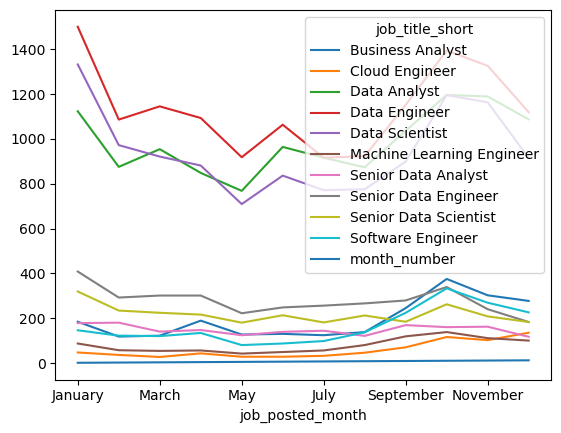

In [ ]:
df_filter_pivot[top].plot(kind='line')

In [34]:
top_3 = df_filter['job_title_short'].value_counts().head(5)
top_5 = top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

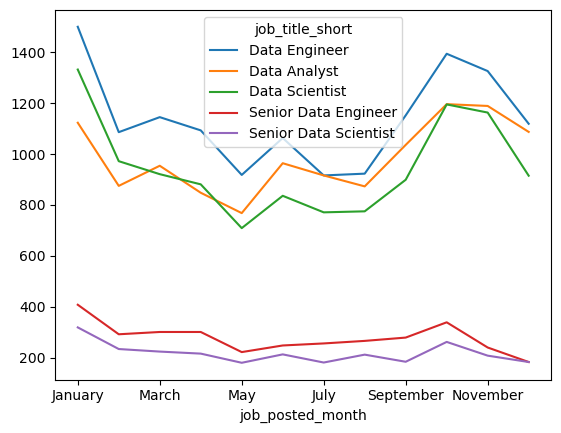

In [35]:
df_filter_pivot[top_5].plot(kind='line')